In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import zipfile


In [8]:
zip_path = r"C:\Users\dinesh mishra\OneDrive\New_Folder\PRODIGY_TrackCode_TaskNumber\Task-01 (Predict House Price)\house-prices-advanced-regression-techniques.zip"

In [9]:
extract_path = r"C:\Users\dinesh mishra\OneDrive\New_Folder\PRODIGY_TrackCode_TaskNumber\Task-01 (Predict House Price)"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

df=pd.read_csv(r"train.csv")


In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
newdf=df.drop('Id',axis=1)
newdf.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [13]:
features=['GrLivArea','BedroomAbvGr','FullBath','HalfBath']
target='SalePrice'

In [14]:
X = df[features]
y = df[target]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
model=LinearRegression()


In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_predict=model.predict(x_test)

In [19]:
mse=mean_squared_error(y_test,y_predict)
mse

np.float64(2539513133.2505074)

In [20]:
rmse=mse**0.5
rmse

np.float64(50393.58226253128)

In [21]:
model.coef_

array([   103.73352164, -25984.83156751,  32651.14837946,   3988.59993943])

In [22]:
model.intercept_

np.float64(45824.78236220768)

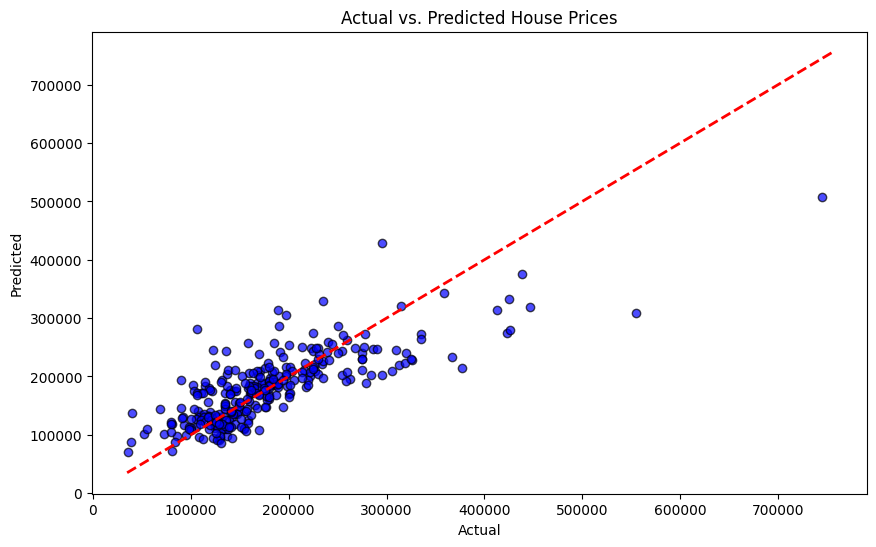

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.7, edgecolors='k', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [24]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())  # Regression model
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'regressor': [LinearRegression(), Ridge(), Lasso()],
    'regressor__alpha': [0.1, 1.0, 10.0]  # Only applies to Ridge and Lasso
}

In [25]:


# Select the relevant features and the target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

X = df[features]
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Feature engineering: Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [27]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

In [28]:
param_grid_lr = {
    'regressor__fit_intercept': [True, False]
}

param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True, False]
}

param_grid_lasso = {
    'regressor__alpha': [0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True, False]
}

In [29]:
pipelines = [pipeline_lr, pipeline_ridge, pipeline_lasso]
param_grids = [param_grid_lr, param_grid_ridge, param_grid_lasso]


In [30]:
best_models = []
for pipeline, param_grid in zip(pipelines, param_grids):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_selected, y_train)
    best_models.append(grid_search.best_estimator_)

# Select the best model based on R^2 score
best_model = max(best_models, key=lambda model: model.score(X_test_selected, y_test))

# Make predictions
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.971e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.269e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

In [31]:
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Best Model: {best_model}')

Root Mean Squared Error: 48754.242812019926
R^2 Score: 0.6901075484969387
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])


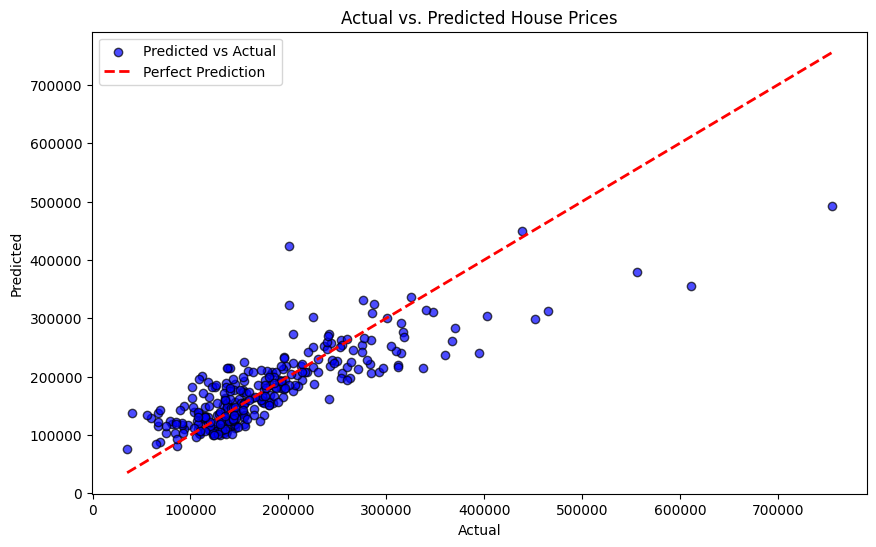

In [32]:
plt.figure(figsize=(10, 6))  # Create a new figure with specific size
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', color='blue', label='Predicted vs Actual')  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')  # Reference line
plt.xlabel('Actual')  # Label for x-axis
plt.ylabel('Predicted')  # Label for y-axis
plt.title('Actual vs. Predicted House Prices')  # Title of the plot
plt.legend()  # Add legend
plt.show()  # Display

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\dinesh mishra\AppData\Local\Temp\ipykernel_9328\1623594019.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


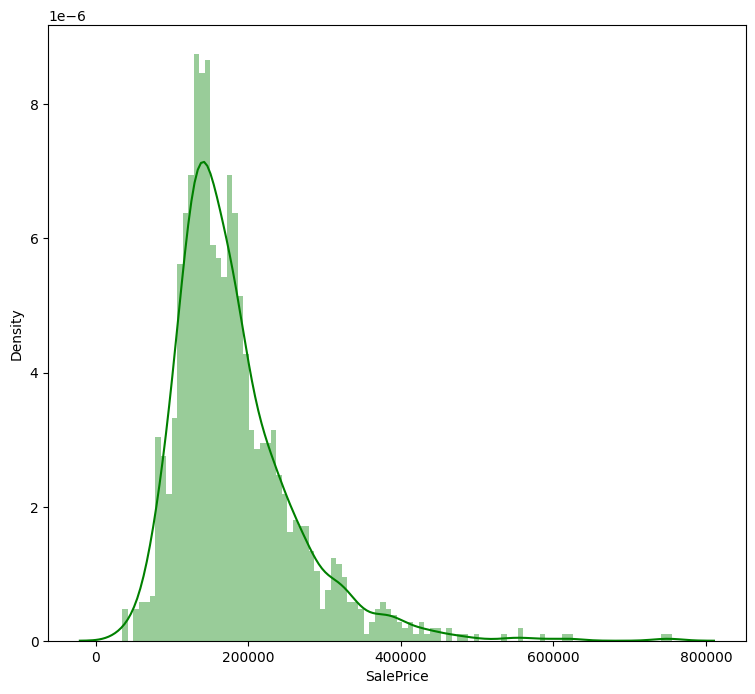

In [33]:
print(newdf['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(newdf['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});